# Introduction

![](https://st4.depositphotos.com/3900811/21753/v/600/depositphotos_217531240-stock-illustration-pneumonia-vector-illustration-labeled-diagram.jpg)

Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus (purulent material), causing cough with phlegm or pus, fever, chills, and difficulty breathing. A variety of organisms, including bacteria, viruses and fungi, can cause pneumonia.

Pneumonia can range in seriousness from mild to life-threatening. It is most serious for infants and young children, people older than age 65, and people with health problems or weakened immune systems.

[References](https://www.mayoclinic.org/diseases-conditions/pneumonia/symptoms-causes/syc-20354204)

# Importing libraries

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/ImageData/

/content/gdrive/My Drive/ImageData


# Showing some images

In [ ]:
normal1 = Image.open('train/NORMAL/IM-0115-0001.jpeg')
normal2 = Image.open('train/NORMAL/IM-0117-0001.jpeg')
normal3 = Image.open('train/NORMAL/IM-0119-0001.jpeg')
normal4 = Image.open('train/NORMAL/IM-0122-0001.jpeg')
pneumonia1 = Image.open('train/PNEUMONIA/person1000_bacteria_2931.jpeg')
pneumonia2 = Image.open('train/PNEUMONIA/person1000_virus_1681.jpeg')
pneumonia3 = Image.open('train/PNEUMONIA/person1001_bacteria_2932.jpeg')
pneumonia4 = Image.open('train/PNEUMONIA/person1002_bacteria_2933.jpeg')

normal1 = normal1.resize((200,200))
normal2 = normal2.resize((200,200))
normal3 = normal3.resize((200,200))
normal4 = normal4.resize((200,200))
pneumonia1 = pneumonia1.resize((200,200))
pneumonia2 = pneumonia2.resize((200,200))
pneumonia3 = pneumonia3.resize((200,200))
pneumonia4 = pneumonia4.resize((200,200))

In [ ]:
def showImages(img1, img2, img3,img4):
  img = Image.new('RGB',(img1.width + img2.width + img3.width + img4.width, img1.height))
  img.paste(img1,(0,0))
  img.paste(img2,(img1.width,0))
  img.paste(img3,(400,0))
  img.paste(img4,(600,0))
  return img

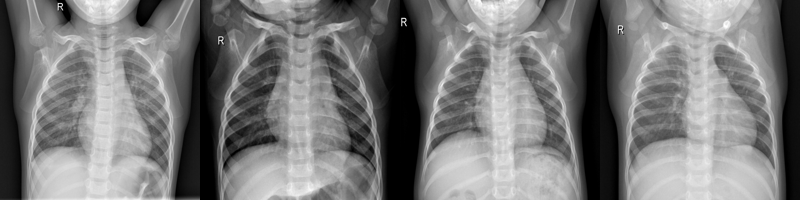

In [ ]:
showImages(normal1, normal2, normal3, normal4)

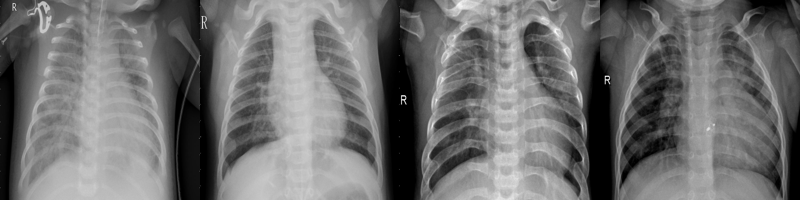

In [ ]:
showImages(pneumonia1, pneumonia2, pneumonia3, pneumonia4)

# Building the Neural Network

In [ ]:
classification = Sequential()
classification.add(Conv2D(32, (3,3), input_shape = (64, 64, 3), activation = 'relu'))
classification.add(BatchNormalization())
classification.add(MaxPooling2D(pool_size = (2,2)))
#classification.add(AveragePooling2D(pool_size=(2,2)))
classification.add(Conv2D(32, (3,3), input_shape = (64, 64, 3), activation = 'relu'))
classification.add(BatchNormalization())
#classification.add(AveragePooling2D(pool_size=(2,2)))
classification.add(MaxPooling2D(pool_size = (2,2)))

classification.add(Flatten())

classification.add(Dense(units = 32, activation = 'relu'))
classification.add(Dropout(0.2))
classification.add(Dense(units = 32, activation = 'relu'))
classification.add(Dropout(0.2))
#classification.add(Dense(units = 1, activation = 'sigmoid'))
classification.add(Dense(units = 1, activation = 'tanh'))

In [ ]:
classification.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 batch_normalization_8 (Batc  (None, 62, 62, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 batch_normalization_9 (Batc  (None, 29, 29, 32)       128       
 hNormalization)                                                 
                                                      

In [ ]:
classification.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
train_generator = ImageDataGenerator(rescale = 1./255,
                                     rotation_range = 7,
                                     horizontal_flip = True,
                                     shear_range = 0.2,
                                     height_shift_range = 0.07,
                                     zoom_range = 0.2)

test_generator = ImageDataGenerator(rescale = 1./255)

val_generator = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_base = train_generator.flow_from_directory('train', target_size = (64, 64),
                                                           batch_size = 32, class_mode = 'binary')

Found 160 images belonging to 2 classes.


In [ ]:
test_base = test_generator.flow_from_directory('test', target_size = (64, 64),
                                               batch_size = 32, class_mode = 'binary')

Found 20 images belonging to 2 classes.


In [ ]:
val_base = val_generator.flow_from_directory('val', target_size = (64, 64),
                                            batch_size = 32, class_mode = 'binary')

Found 16 images belonging to 2 classes.


In [ ]:
history = classification.fit(train_base, steps_per_epoch = len(train_base),
                             epochs = 10,
                             validation_data = val_base,
                             validation_steps = len(test_base))

Epoch 1/10
5/5 [==============================] - 7s 1s/step - loss: 5.5200 - accuracy: 0.5375 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 6s 1s/step - loss: 3.3698 - accuracy: 0.6562 - val_loss: 4.7853 - val_accuracy: 0.5000
Epoch 3/10
5/5 [==============================] - 4s 817ms/step - loss: 2.3818 - accuracy: 0.7375 - val_loss: 0.7073 - val_accuracy: 0.5000
Epoch 4/10
5/5 [==============================] - 6s 1s/step - loss: 3.9203 - accuracy: 0.5813 - val_loss: 0.6649 - val_accuracy: 0.5625
Epoch 5/10
5/5 [==============================] - 4s 860ms/step - loss: 3.9313 - accuracy: 0.6750 - val_loss: 0.6447 - val_accuracy: 0.6250
Epoch 6/10
5/5 [==============================] - 5s 916ms/step - loss: 4.6853 - accuracy: 0.6562 - val_loss: 0.6859 - val_accuracy: 0.5000
Epoch 7/10
5/5 [==============================] - 6s 1s/step - loss: 5.4759 - accuracy: 0.6187 - val_loss: 0.7839 - val_accuracy: 0.5000
Epoch 8/10
5/5 [================

# Analysing the model

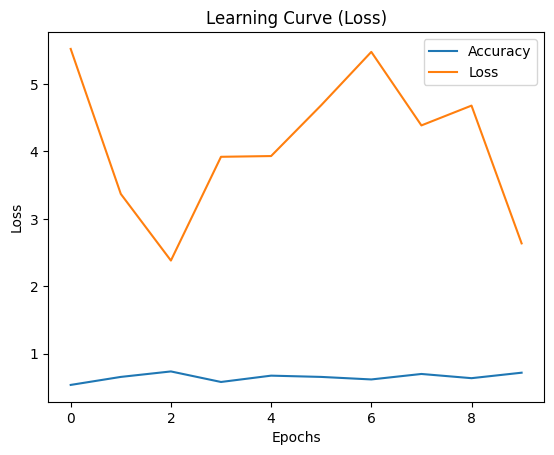

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Learning Curve (Loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Accuracy', 'Loss'])
plt.show()

In [ ]:
test = classification.evaluate(test_base)

1/1 [==============================] - 0s 402ms/step - loss: 1.4135 - accuracy: 0.5000


In [ ]:
print("Loss: ", test[0])
print("Accuracy: ", test[1])


Loss:  1.4134800434112549
Accuracy:  0.5
